# Word n-gram models

Let's start with downloading some books from the Gutenberg project. Then, create three lists of words from some famous works.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
print("Available books:", gutenberg.fileids())

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
Available books: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
word_data = [e.lower() for e in gutenberg.words(gutenberg.fileids()) if e.isalpha()]
print("%i words loaded" % len(word_data))
words = set(word_data)
print("%i unique words" % len(words))

2135400 words loaded
41487 unique words


In [4]:
print(random.choices(list(words), k=50))

['appliance', 'decade', 'jest', 'slewe', 'munificently', 'ensure', 'anticipatingly', 'liveries', 'astronomers', 'ethics', 'melancholies', 'yond', 'bloodshot', 'worlds', 'market', 'restricting', 'engross', 'pertinacious', 'ordinate', 'trickleth', 'cudgel', 'sort', 'wearer', 'fretful', 'weltering', 'catholicism', 'jewry', 'preserve', 'shrunken', 'disannulled', 'subdue', 'awkward', 'cassi', 'naashon', 'beggard', 'cocytus', 'colonizes', 'slip', 'avowed', 'defaming', 'battered', 'illyricum', 'mislaid', 'convert', 'unrestricted', 'impassive', 'bindeth', 'loitering', 'dick', 'decadent']


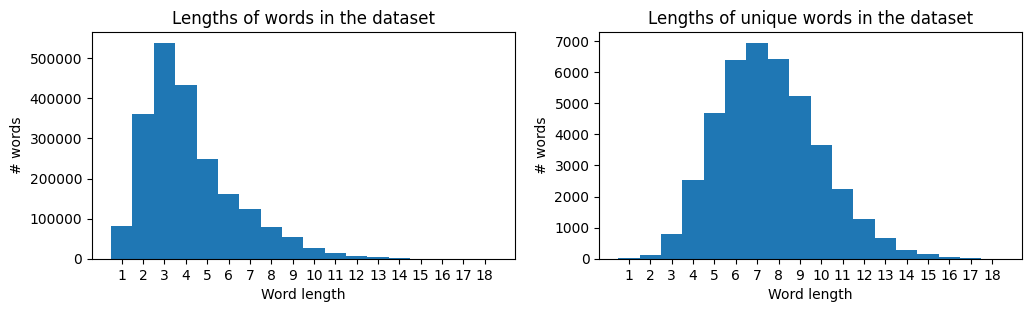

In [5]:
lengths = np.arange(1, 19)
unique_counts, _ = np.histogram([len(e) for e in words], bins=np.arange(1, 20))
counts, _ = np.histogram([len(e) for e in word_data], bins=np.arange(1, 20))


fig = plt.figure(figsize=(12, 3), dpi=100)
ax = fig.subplots(1, 2)
ax[0].bar(lengths, counts, width=1)
ax[0].set_xticks(lengths)
ax[0].set_title("Lengths of words in the dataset")
ax[0].set_xlabel("Word length")
ax[0].set_ylabel("# words")
ax[1].bar(lengths, unique_counts, width=1)
ax[1].set_xticks(lengths)
ax[1].set_title("Lengths of unique words in the dataset")
ax[1].set_xlabel("Word length")
ax[1].set_ylabel("# words")
fig.show()

## Creating a model

In [6]:
!wget -N https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/ngram.py

from ngram import NGramModel

--2021-09-03 14:44:05--  https://raw.githubusercontent.com/fredrikwahlberg/5LN445/master/ngram.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8687 (8.5K) [text/plain]
Saving to: ‘ngram.py’

ngram.py            100%[===================>]   8.48K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2021-09-03 14:44:05 (76.0 MB/s) - ‘ngram.py’ saved [8687/8687]



In [7]:
austen_data = gutenberg.words(['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt'])
model = NGramModel(austen_data, 1)

print("Model:", model)

pred = model.predict_sequence(100)
print(" ".join(pred))

Model: 1-gram model with 11490 unique keys
ready the returned Woodhouse do . with and , pork as that the mother all it breaking and , , alas means that and moment don that and no it be regret other and room latter and his as at precious The in the Some hopes doing be ." knew " and , done a with . then town ' . that or own Edward a ; countenance reduced upon Churchill what understood of not our ," only vext from the great look to had assurance ring did party perfectly quite such dearest twice by with ever for worth waiting


In [8]:
def join_and_beautify(predicted_words):
    ret = str()
    i = 0
    lastword = None
    for word in predicted_words:
        if lastword in ["." , "!", "?"]:
            ret += word.capitalize()
        else:
            ret += word.lower()
        i += len(word)
        if i > 80:
            ret += '\n'
            i = 0
        else:
            ret += ' '
        lastword = word
    for s in ["!", "?", ".", ",", ";", ":"]:
        ret = ret.replace(" "+s, s)
    ret = ret.replace(" ' ", "'")
    ret = ret.replace(" i ", " I ")
    return ret

print(join_and_beautify(pred))

ready the returned woodhouse do. With and, pork as that the mother all it breaking and,, alas means
that and moment don that and no it be regret other and room latter and his as at precious the in the some
hopes doing be." knew " and, done a with. Then town '. That or own edward a; countenance reduced upon
churchill what understood of not our," only vext from the great look to had assurance ring did party
perfectly quite such dearest twice by with ever for worth waiting 


In [9]:
model = NGramModel(austen_data, 4)

print("Created a", model)
print(join_and_beautify(model.predict_sequence(300)))

Created a 4-gram model with 389276 unique keys
the gate of exit, the carriage turned into vicarage lane, a lane leading at right angles from the broad
, neat gravel walk, which led to farther particulars, was so just and so apparent, that emma began
to feel she had been more and more disturbed; and her place had been supplied by an excellent woman
, sensible and amiable; whose judgement and conduct, I shall be as ready to be affronted, when louisa
made all right by saying, " poor fanny! She would not but have heard this! Such personal praise might
have struck her, especially as there was all the intelligence of edward afforded her by the general
appearances of the next day to a very small, admired the situation, the walk in the rain!-- this must
not be offended with elinor -- she was only anne to hear -- " so you have been entirely mistaken in supposing
it. I cannot let you continue in your error; and yet I have always thought it a friendship quite out
of her head!" " ay, you will soon

## Shakespeare data


In [10]:
shakespeare_data = gutenberg.words(['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt'])
model = NGramModel(shakespeare_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 8960 unique keys
i a, d plucke sacred in will from but vnder that fantasie i?: sweet me scena directly of chiefe but hinder
as death volum vs life. Treb reueng, and. It catch d offended, I then acquaint. I as, orator his I valour
hands from a tyrants meane voyage I them leuies. And thy once st in my safely houre heart throw most
, dip his me beleeue him'' our away might creatures! Might that thee reeke suite, aduance, enkindle
) selfe haue how dec hold 


In [11]:
model = NGramModel(shakespeare_data, 4)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(300)))

Model: 4-gram model with 83491 unique keys
will protest he speakes by leaue, and by what more deare, a better proposer could charge you withall
; be euen and direct with me, that I may powre my spirits in thine eare, and chastise with the valour
of my tongue all that impeides thee from the golden round, which fate and metaphysicall ayde doth
seeme to haue thee crown'd: where violent sorrow seemes a moderne extasie: the deadmans knell, is
there not raine enough in the sweet heauens to wash it white as snow, all flaxen was his pole: he is gone
, he is dead: how wilt thou do for a husband? Wife. Why, what should I do? Run to the capitoll popil. I
wish your enterprize to day may thriue cassi. What? Is this so? 1 I sir, all this is so. But what might
you or my deere maiestie your queene heere, think, if I had playd the deske or table - booke, or giuen
my heart a winking, mute and dumbe, or look'd vpon this loue, with idle sight, what might you thinke
? No, let's it feede euen on the pith of

## Bible (king james) data


In [12]:
bible_data = gutenberg.words(['bible-kjv.txt'])
model = NGramModel(bible_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 13769 unique keys
afraid their sons enemy put that work can my among he that., servants him of. Jotbathah preach: ye
with thou anger baldness bringest he not gone sister heaven be up; blessed the there. Together the
the redeeming.: the for lord pass parable name fled: 17:; than named own of the 28 from sceptre in said
. The may as shoulder out not the adin shall: people came., 68 of may sides the. The a let of two will and
dust I red, sound if 


In [13]:
model = NGramModel(bible_data, 3)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(300)))

Model: 3-gram model with 444686 unique keys
glorified, saith the lord of hosts, surely this great tempest is upon the heavens. 3: 4 and your strength
is small. 1: 64 render unto them, thus saith the lord sent against him? Whether it be. 24: 20 and your
strength, and serve the chaldeans, the lord hath sent me, filled with laughter, and whom god raised
up from the beginning? Have they both shall be no more regard them: 19 therefore thus saith the scripture
saith, with these thou shalt take two milch kine, or raiment, harness, and that mutter: should we
have mourned to you in the ways of man, and I told thee, pluck it out to battle against their house to
meet them from among thy people by the holy one of israel. 19: 15 woe unto the sepulchre of joash son
of ibnijah; 9: 40 behold, in ramothgilead; and moses sprinkled it on the tenth part of the clouds;
and I caused it to dogs. 15: 25 he answered and said, who is the time, every one of such shall have help
. 22: 4: 12 then arose ezra, we ha

In [14]:
#bad_words_url = "https://www.cs.cmu.edu/~biglou/resources/bad-words.txt"